## Model 6 finetune with ResNet50

In [1]:
import matplotlib

# import the necessary packages
#import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from tensorflow.keras import layers

from tensorflow.keras.utils import image_dataset_from_directory

In [2]:
DATASET_DIR  = r"F:\data for final project sem3\archive\Coronahack-Chest-XRay-Dataset\Coronahack-Chest-XRay-Dataset\exp4\train"

In [3]:
IMG_W = 150
IMG_H = 150
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 50
BATCH_SIZE = 8


train_datagen = ImageDataGenerator(rescale=1./255,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True,
    validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    DATASET_DIR, 
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle= True,
    subset='validation')


new_base_dir = r"F:\data for final project sem3\archive\Coronahack-Chest-XRay-Dataset\Coronahack-Chest-XRay-Dataset\exp4\test"

train_datagen = ImageDataGenerator(rescale=1./255)

test_generator = train_datagen.flow_from_directory(new_base_dir,
                                                   target_size=(IMG_H, IMG_W),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='binary')

Found 480 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [4]:
conv_base = ResNet50(weights="imagenet",
                     include_top=False,
                     input_tensor=Input(shape=INPUT_SHAPE))

In [5]:
inputs = keras.Input(INPUT_SHAPE)
x = inputs
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model6 = keras.Model(inputs, outputs)
model6.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

In [6]:
conv_base.trainable = False

In [7]:
model6.compile(loss="binary_crossentropy",
               optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
               metrics=["accuracy",tf.keras.metrics.TruePositives(), tf.keras.metrics.TrueNegatives()])
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning_resnet_model_try2_300.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model6.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=callbacks)

Epoch 1/50
60/60 [==============================] - 32s 438ms/step - loss: 0.8323 - accuracy: 0.5104 - true_positives: 122.0000 - true_negatives: 123.0000 - val_loss: 0.6498 - val_accuracy: 0.5250 - val_true_positives: 3.0000 - val_true_negatives: 60.0000


C:\Users\Dante\AppData\Roaming\Python\Python38\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/50
60/60 [==============================] - 10s 164ms/step - loss: 0.6965 - accuracy: 0.5729 - true_positives: 135.0000 - true_negatives: 140.0000 - val_loss: 0.5820 - val_accuracy: 0.7500 - val_true_positives: 48.0000 - val_true_negatives: 42.0000
Epoch 3/50
60/60 [==============================] - 10s 167ms/step - loss: 0.6324 - accuracy: 0.6542 - true_positives: 156.0000 - true_negatives: 158.0000 - val_loss: 0.5522 - val_accuracy: 0.7833 - val_true_positives: 36.0000 - val_true_negatives: 58.0000
Epoch 4/50
60/60 [==============================] - 10s 167ms/step - loss: 0.6008 - accuracy: 0.6938 - true_positives: 160.0000 - true_negatives: 173.0000 - val_loss: 0.6008 - val_accuracy: 0.5917 - val_true_positives: 55.0000 - val_true_negatives: 16.0000
Epoch 5/50
60/60 [==============================] - 10s 160ms/step - loss: 0.5424 - accuracy: 0.7125 - true_positives: 175.0000 - true_negatives: 167.0000 - val_loss: 0.5187 - val_accuracy: 0.8250 - val_true_positives: 40.0000 - 

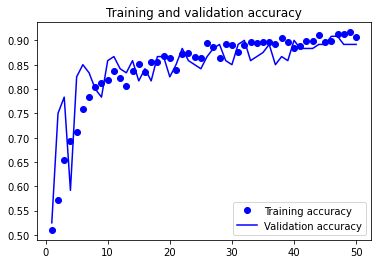

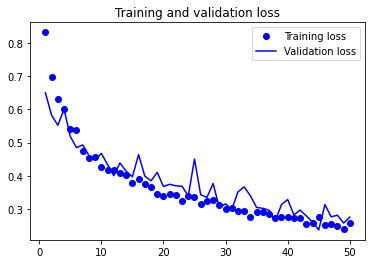

In [8]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [9]:
model6 = keras.models.load_model("fine_tuning_resnet_model_try2_300.keras")

In [14]:
conv_base.trainable = True
for layer in conv_base.layers[:-3]:
    layer.trainable = False

In [15]:
model6.compile(loss="binary_crossentropy",
               optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
               metrics=["accuracy",tf.keras.metrics.TruePositives(), tf.keras.metrics.TrueNegatives()])
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning_resnet_model_try2_300_2.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model6.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=callbacks)

Epoch 1/50
60/60 [==============================] - 15s 185ms/step - loss: 0.2574 - accuracy: 0.8958 - true_positives_1: 211.0000 - true_negatives_1: 219.0000 - val_loss: 0.2464 - val_accuracy: 0.9167 - val_true_positives_1: 53.0000 - val_true_negatives_1: 57.0000
Epoch 2/50
60/60 [==============================] - 9s 158ms/step - loss: 0.2490 - accuracy: 0.9187 - true_positives_1: 215.0000 - true_negatives_1: 226.0000 - val_loss: 0.3097 - val_accuracy: 0.9000 - val_true_positives_1: 48.0000 - val_true_negatives_1: 60.0000
Epoch 3/50
60/60 [==============================] - 9s 157ms/step - loss: 0.2643 - accuracy: 0.9042 - true_positives_1: 215.0000 - true_negatives_1: 219.0000 - val_loss: 0.3342 - val_accuracy: 0.8833 - val_true_positives_1: 46.0000 - val_true_negatives_1: 60.0000
Epoch 4/50
60/60 [==============================] - 10s 173ms/step - loss: 0.2492 - accuracy: 0.9083 - true_positives_1: 214.0000 - true_negatives_1: 222.0000 - val_loss: 0.2710 - val_accuracy: 0.8833 - val_

Epoch 32/50
60/60 [==============================] - 9s 155ms/step - loss: 0.2140 - accuracy: 0.9125 - true_positives_1: 215.0000 - true_negatives_1: 223.0000 - val_loss: 0.2123 - val_accuracy: 0.9083 - val_true_positives_1: 54.0000 - val_true_negatives_1: 55.0000
Epoch 33/50
60/60 [==============================] - 9s 150ms/step - loss: 0.2110 - accuracy: 0.9271 - true_positives_1: 219.0000 - true_negatives_1: 226.0000 - val_loss: 0.2195 - val_accuracy: 0.8917 - val_true_positives_1: 49.0000 - val_true_negatives_1: 58.0000
Epoch 34/50
60/60 [==============================] - 9s 151ms/step - loss: 0.2031 - accuracy: 0.9354 - true_positives_1: 222.0000 - true_negatives_1: 227.0000 - val_loss: 0.2508 - val_accuracy: 0.8917 - val_true_positives_1: 49.0000 - val_true_negatives_1: 58.0000
Epoch 35/50
60/60 [==============================] - 9s 151ms/step - loss: 0.1919 - accuracy: 0.9333 - true_positives_1: 221.0000 - true_negatives_1: 227.0000 - val_loss: 0.1887 - val_accuracy: 0.9250 - va

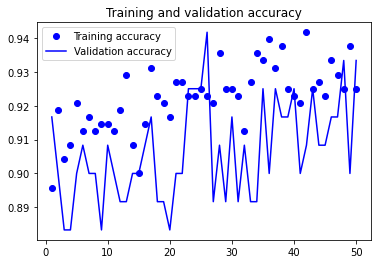

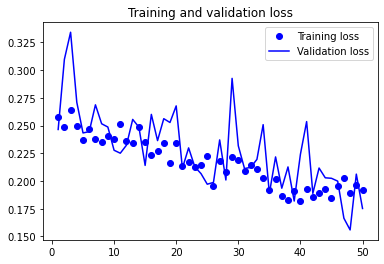

In [16]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [17]:
test_loss, test_acc, true_pos, true_neg = model6.evaluate(test_generator)

print(f"Test accuracy: {test_acc:.3f}")

78/78 [==============================] - 6s 75ms/step - loss: 0.3553 - accuracy: 0.8365 - true_positives_1: 369.0000 - true_negatives_1: 153.0000
Test accuracy: 0.837
